Enter all group member names (no more than 3) in the cell below:

If you worked on this in a group, but are submitting independently, write your name on one line and indicate the group members by writing "with assistance from:" on the next line. 

In [ ]:
Sayemum Hassan

# K-Nearest Neighbors Homework

Learning objectives:
* Gain an appreciation for the strengths and weaknesses of KNN classifiers.
* Explore the computiational requirements of neighborhood searches for KNN.

## Exercise 1 - Irisis

The code in the cell below loads a modified version of the famous Iris data set (published by R.A. Fisher in 1936). The point of this data set is to predict the species of a flower (three classes) by examining several measurements taken from the petals.  This is considered an easy classification problem because the three different classes are well separated in feature space. 

I've modified this data set in a way that makes classification more difficult.

The cell below uses cross-validation to tune both the decision tree and KNN classifier.

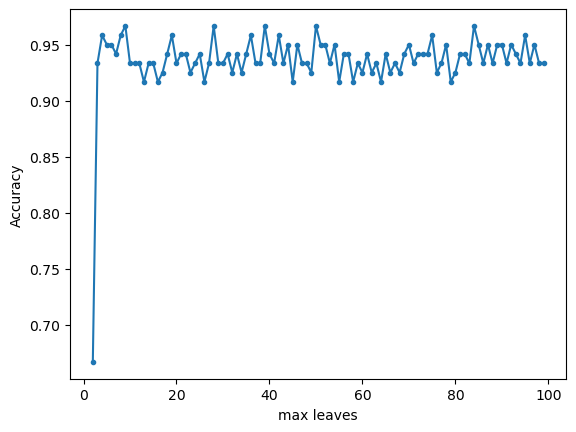

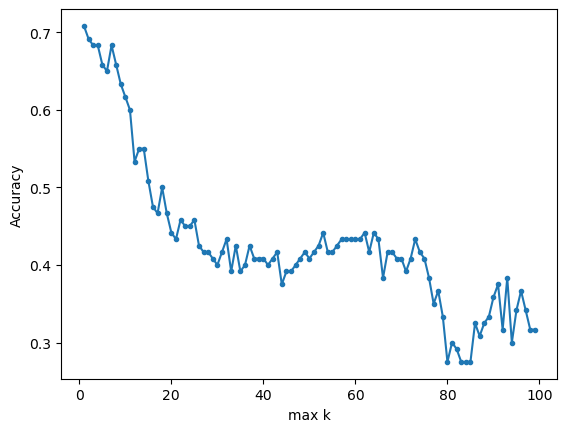

In [14]:
# %matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import datasource
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.neighbors as neighbors
from sklearn import model_selection 

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Read in the data...
X, y = datasource.get_iris_data()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                    train_size=0.8,
                                                                    test_size=0.2,
                                                                    random_state=20,
                                                                    stratify=y)

# TUNE OUR DECISION TREE--------------------------------------

folds = 10
max_max_leaves = 100
accuracies = np.zeros((folds,100 - 2))

# Loop over all of the hyperparameter settings
for size in range(2, max_max_leaves):
    tree = DecisionTreeClassifier(max_leaf_nodes=size)
    
    # Returns an array of cross validation results.
    accuracies[:, size - 2] = model_selection.cross_val_score(tree, X_train, y_train, 
                                         cv=folds, scoring='accuracy')
accuracies_avg = np.mean(accuracies, axis=0)

plt.plot(np.arange(2, max_max_leaves), accuracies_avg, '.-')
plt.xlabel('max leaves')
plt.ylabel('Accuracy')
plt.show()

# NOW REPEAT THE PROCESS FOR KNN------------------------------

max_k = 100
accuracies = np.zeros((folds,max_k - 1))

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    # Returns an array of cross validation results.
    accuracies[:, k - 1] = model_selection.cross_val_score(knn, X_train, y_train, 
                                                cv=folds, scoring='accuracy')
accuracies_avg = np.mean(accuracies, axis=0)
plt.figure()
plt.plot(np.arange(1, max_k), accuracies_avg, '.-')
plt.xlabel('max k')
plt.ylabel('Accuracy')
plt.show()

# SET THE VALUES BELOW BASED ON CROSS-VALIDATION RESULTS

max_leaf_nodes = 10
n_neighbors = 3

# YOUR CODE HERE
# raise NotImplementedError()


In [15]:
# Enter your hyper-parameters below...

final_tree = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)
final_tree.fit(X_train, y_train)
print("Decision tree accuracy: {:.4f}".format(final_tree.score(X_test, y_test)))

final_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
final_knn.fit(X_train, y_train)
print("KNN accuracy:           {:.4f}".format(final_knn.score(X_test, y_test)))

Decision tree accuracy: 1.0000
KNN accuracy:           0.6000


In [16]:
from numpy.testing import assert_almost_equal

knn_accuracy = final_tree.score(X_test, y_test)
assert_almost_equal(1.0, knn_accuracy) 

knn_accuracy = final_knn.score(X_test, y_test)
assert_almost_equal(.6, knn_accuracy) 

## Exercise 2 - Data Exploration and Pre-processing

The decision tree above was able to acheive a significantly lower error rate than KNN.  Your goal now is to solve the following two problems:

1. Determine what it is about the provided data that makes this problem so much harder for KNN.
2. Perform pre-processing on the data to make classification easier for KNN.

Suggestions:

* Look at the variance of the different attributes:
    * Attributes with a large variance can "drown out" other attributes when Euclidean distance is used for neighborhood calculations. It can be helpful to *normalize* the variance of the different dimensions by rescaling them. (example below)
* Ask the decision tree!  The decision tree class has a [`_feature_importances`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) that tracks which attributes/features are doing the most work in the tree.
* Use scatter plots to plot each attribute against the class label.
* Use [seaborn](https://seaborn.pydata.org) to plot pairwise relationships between attributes. (Example in the cell below.)


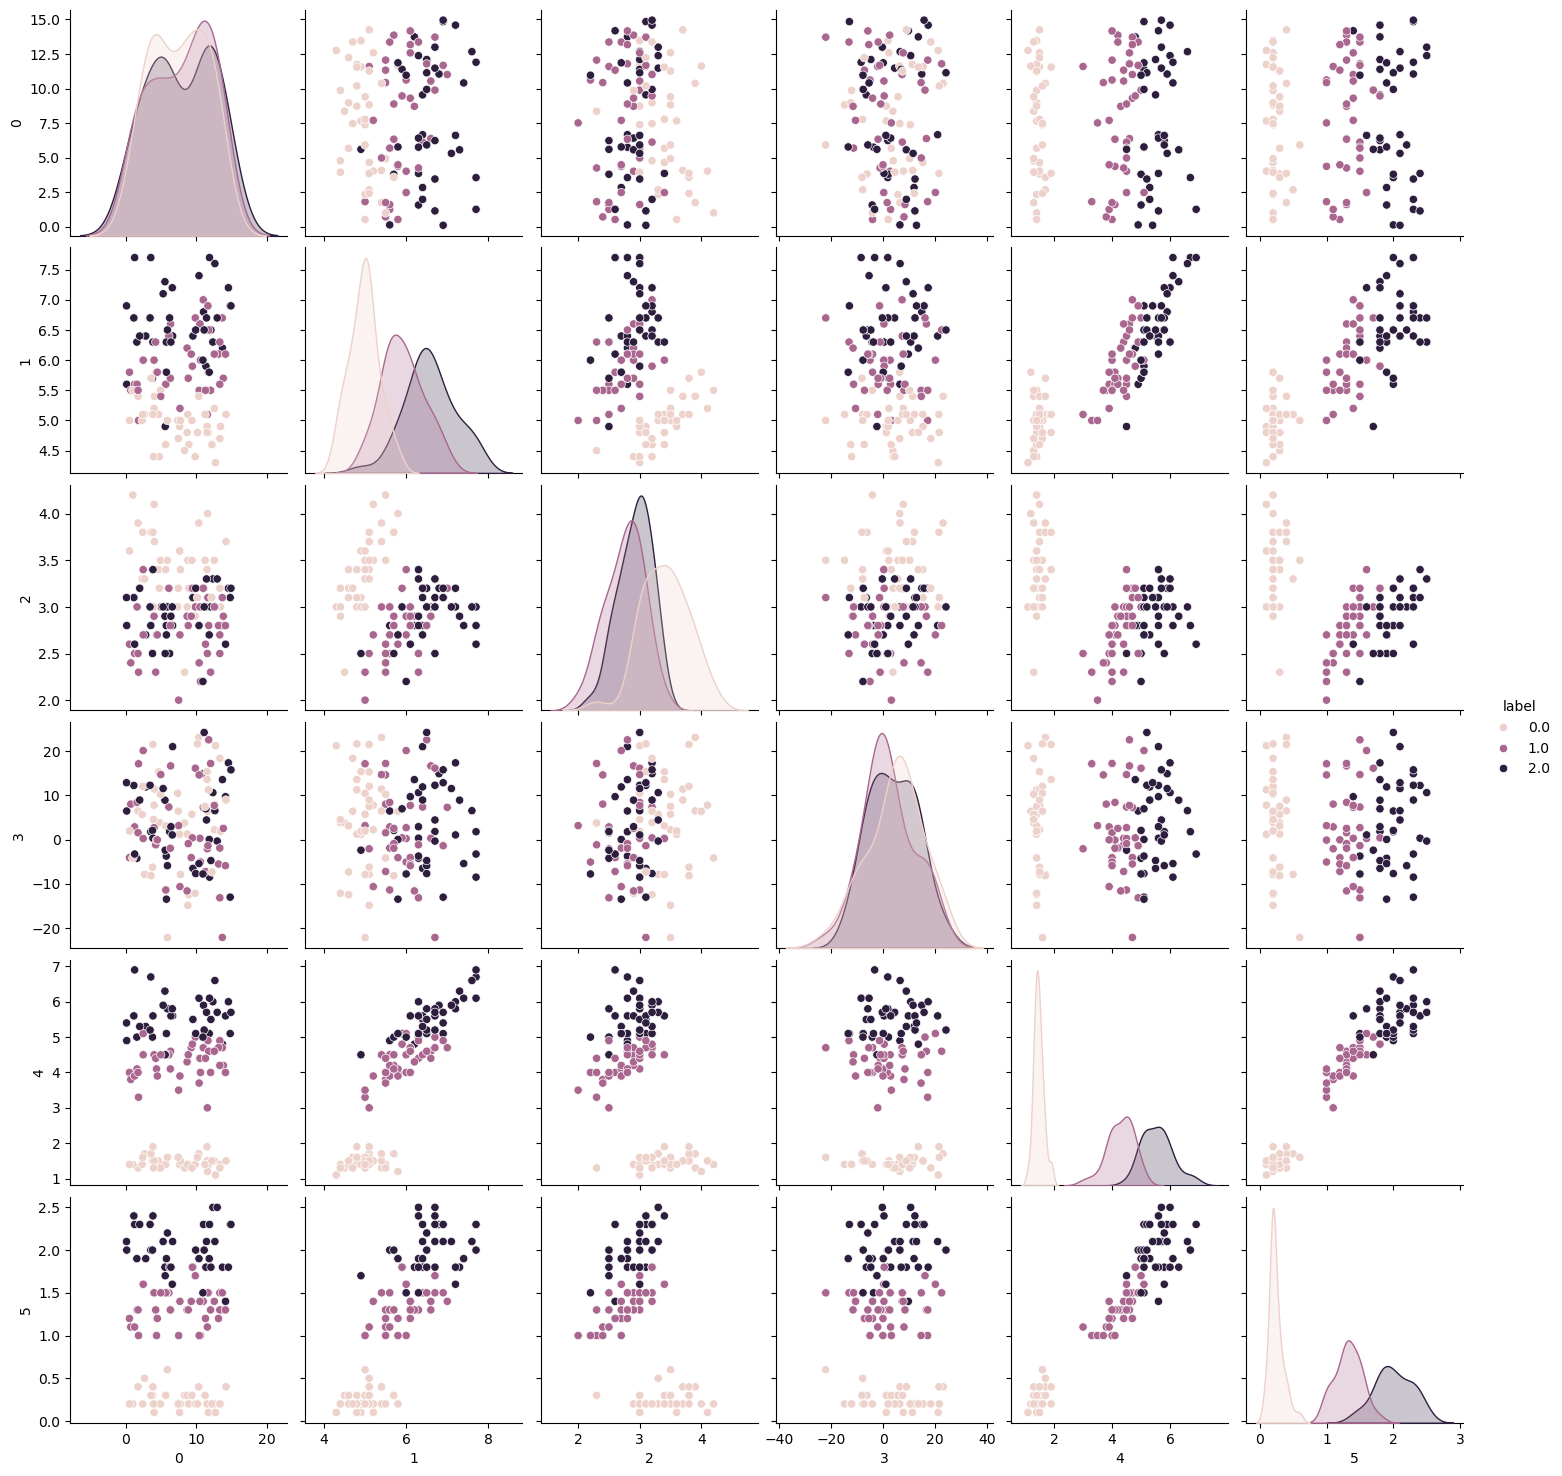

In [12]:
# SCATTER PLOT EXAMPLE

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Recombine data and labels into a single numpy array:
data = np.append(X_train, y_train.reshape(-1, 1), axis=1)

# Create a pandas "DataFrame"
frame = pd.DataFrame(data=data, 
                     columns=['0', '1', '2', '3', '4', '5', 'label'])

sns.pairplot(frame, hue='label')
                 
plt.show()              

### Normalization

A common pre-processing step for machine learning is normalizing the attributes so that they each have zero mean and unit variance.  For example, let's look at a scatterplot with dimensions 3 and 5 both before and after rescaling.

In [ ]:
from sklearn import preprocessing

X_tmp = X_train[:, [3, 5]] # Pull out columns 3 and 5.

# Plot before normalization
plt.scatter(X_tmp[:,0], X_tmp[:,1], c=y_train)
plt.axis('equal')
plt.show()

# Rescale 
scaler = preprocessing.StandardScaler().fit(X_tmp)
X_scaled = scaler.transform(X_tmp)

# Plot the rescaled data
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_train)
plt.axis('equal')
plt.show()

In [ ]:
# YOUR CODE HERE!

# In the end you should initialize X_train_fixed to be a modified version of X_train
# that will work better for KNN learning.

# YOUR CODE HERE
raise NotImplementedError()


In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_fixed, y_train)
accuracy = knn.score(X_test_fixed, y_test)
print(accuracy)

assert accuracy > .9

### Questions
* Describe a scenario where KNN would be a better choice than a decision tree.
* Describe a scenario where a decision tree sould be a better choice than KNN.

YOUR ANSWER HERE

## Exercise 3 - KNN Efficiency


The cell below will time KNN lookups using brute-force searches then plot the results as a function of the size of the dataset. BEFORE RUNNING THE CELL, make a prediction about the trend that you expect to see.  Discuss your prediction with your peers, then run the cell and check your answer.  Try repeating this experiment using `kd_tree` instead of `brute` as the lookup algorithm. 

Now try re-running this experiment with a 100-dimensional data set instead of a four-dimensional data set.  How does this change the results?

In [ ]:
from sklearn import datasets
import time

num_features = 4
max_size = 100000
algorithm = 'brute' # 'kd_tree' is the other option

times = []

increment = max_size // 10
start = max_size // 10

sizes = range(start, max_size, increment)
print("Timing", end='')
for num in sizes:
    print(".", end='')
    X, y = datasets.make_classification(n_samples=num, n_features=num_features, n_classes=2)
    # Algorithm can be either 'brute' or 'kd_tree'
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, algorithm=algorithm)
    knn.fit(X,y)

    test_size = max_size//20
    tic = time.time()
    y = knn.predict(X[0:test_size, :])  # Lookup the first 5%
    times.append((time.time() - tic)/test_size)
    
plt.plot(sizes, times)
plt.xlabel('data size')
plt.ylabel('time per lookup (s)')
plt.show()
    

## Questions
* Describe the behavior of KNN under each of the following conditions:
    * Low-dimensional data, brute-force lookups
    * Low-demensional data, kd-tree-based lookups
    * High-dimensional data, brute-force lookups
    * High-demensional data, kd-tree-based lookups

YOUR ANSWER HERE